In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc

import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [11]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline/
fs1 = xr.open_dataset('static.nc', decode_times=False)
av1 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
os1 = xr.open_dataset('ocean.stats.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline/
fs2 = xr.open_dataset('static.nc', decode_times=False)
av2 = xr.open_dataset('averages_00004502.nc', decode_times=False)
os2 = xr.open_dataset('ocean.stats.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/
fs3 = xr.open_dataset('static.nc', decode_times=False)
av3 = xr.open_dataset('averages_00006002.nc', decode_times=False)
os3 = xr.open_dataset('ocean.stats.nc', decode_times=False)

%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline/
fs4 = xr.open_dataset('static.nc', decode_times=False)
os4 = xr.open_dataset('ocean.stats.nc', decode_times=False)
av4 = xr.open_mfdataset(['averages_00001002.nc','averages_00001102.nc','averages_00001202.nc','averages_00001302.nc','averages_00001402.nc'], decode_times=False,combine='by_coords')


%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.25deg_N15_baseline
/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.125deg_N15_baseline
/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline
/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.03125deg_N15_baseline
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [12]:
coriolis=fs1['Coriolis']
np.nanmin(coriolis)

-0.00013704665

In [13]:
#Read in various grid variables from the static file and forcing:

xh1 = fs1.xh.values
yh1 = fs1.yh.values
xq1 = fs1.xq.values
yq1 = fs1.yq.values
APE1= os1.APE.values
Time1=os1.Time.values

xh2 = fs2.xh.values
yh2 = fs2.yh.values
xq2 = fs2.xq.values
yq2 = fs2.yq.values
APE2= os2.APE.values
Time2=os2.Time.values

xh3 = fs3.xh.values
yh3 = fs3.yh.values
xq3 = fs3.xq.values
yq3 = fs3.yq.values
APE3= os3.APE.values
Time3=os3.Time.values

xh4 = fs4.xh.values
yh4 = fs4.yh.values
xq4 = fs4.xq.values
yq4 = fs4.yq.values
APE4= os4.APE.values
Time4=os4.Time.values

In [14]:
QuarterRd1  = np.nanmean(np.array(av1['Rd1'][:,:,:]),axis=0)#First deformation radius
QuarterRd_dx= np.nanmean(np.array(av1['Rd_dx'][:,:,:]),axis=0) #Ratio Rd1 to dx
EighthRd1   = np.nanmean(np.array(av2['Rd1'][:,:,:]),axis=0) #First deformation radius
EighthRd_dx = np.nanmean(np.array(av2['Rd_dx'][:,:,:]),axis=0) #Ratio Rd1 to dx
SixteenthRd1   = np.nanmean(np.array(av3['Rd1'][:,:,:]),axis=0) #First deformation radius
SixteenthRd_dx = np.nanmean(np.array(av3['Rd_dx'][:,:,:]),axis=0) #Ratio Rd1 to dx
ThirtysecondRd1   = np.nanmean(np.array(av4['Rd1'][:,:,:]),axis=0) #First deformation radius
ThirtysecondRd_dx = np.nanmean(np.array(av4['Rd_dx'][:,:,:]),axis=0) #Ratio Rd1 to dx

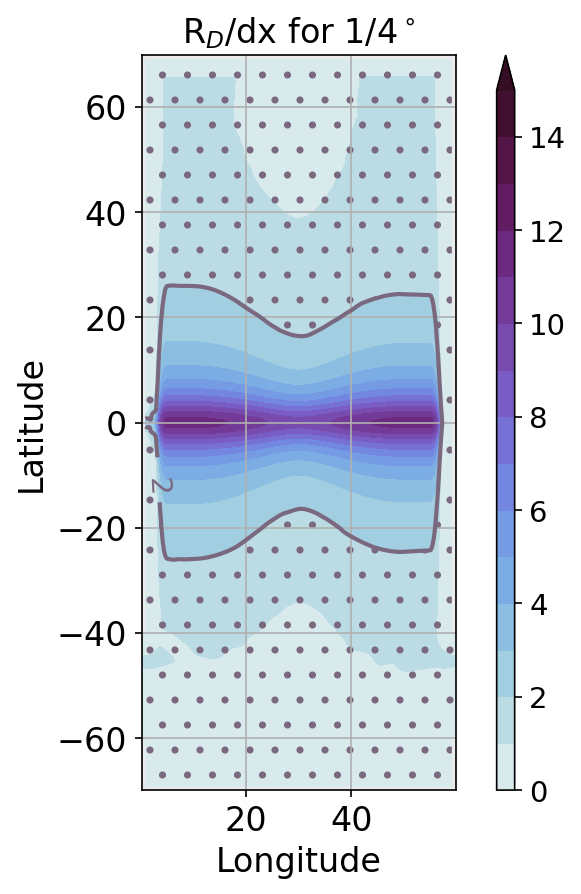

In [43]:
#Plotting Rd_dx 1/4 degree
from matplotlib.patches import Polygon, Patch

fig = plt.figure(figsize=(4, 7), dpi=150, facecolor='w', edgecolor='#7a687f')
plt.rcParams.update({'hatch.color': '#7a687f'})

ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('R$_D$/dx for 1/4$^\circ$',fontsize=16)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

levels=np.linspace(0,15,16)
plotted =ax1.contourf(xh1,yh1,QuarterRd_dx,levels=levels,cmap=cmocean.cm.dense,edgecolor='red',extend='max')
CS=ax1.contour(xh1, yh1,QuarterRd_dx,levels = [2],edgecolor='red',
                 colors=('#7a687f'),linestyles=('-',),linewidths=(2,))
CS1=ax1.contourf(xh1, yh1,QuarterRd_dx,levels = [0,2],alpha=0,
                 linestyles=('-',),hatches='.')



ax1.clabel(CS, fmt = '%2.1d', colors = '#7a687f', fontsize=14)
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
ax1.grid(True)




plt.show()


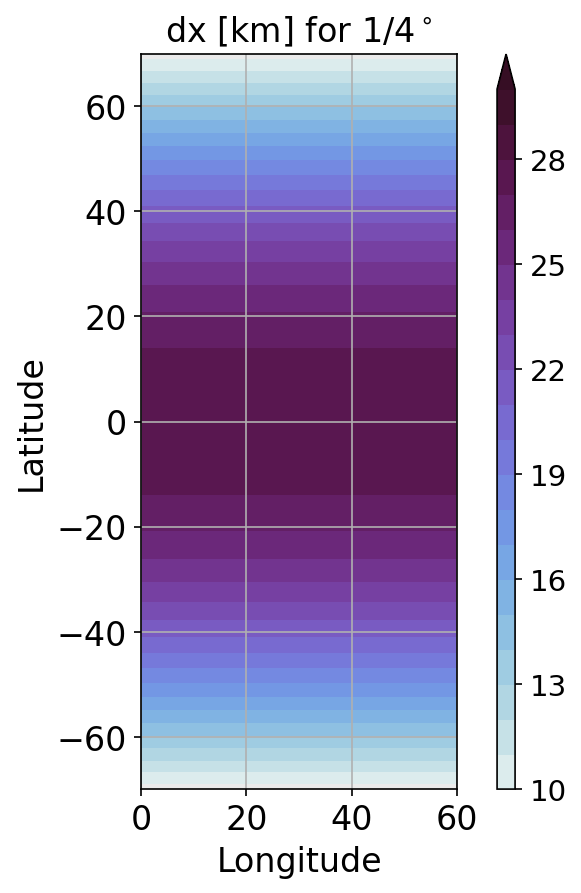

In [28]:
#Plotting dx 1/4 degree
fig = plt.figure(figsize=(4, 7), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('dx [km] for 1/4$^\circ$',fontsize=16)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

levels=np.linspace(10,30,21)
plotted =ax1.contourf(fs1.xq,fs1.yh,fs1.dxCu/1000,levels=levels,cmap=cmocean.cm.dense,extend='max')
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
ax1.grid(True)
plt.show()

In [32]:
400*((2e5)**2)/8

2000000000000.0

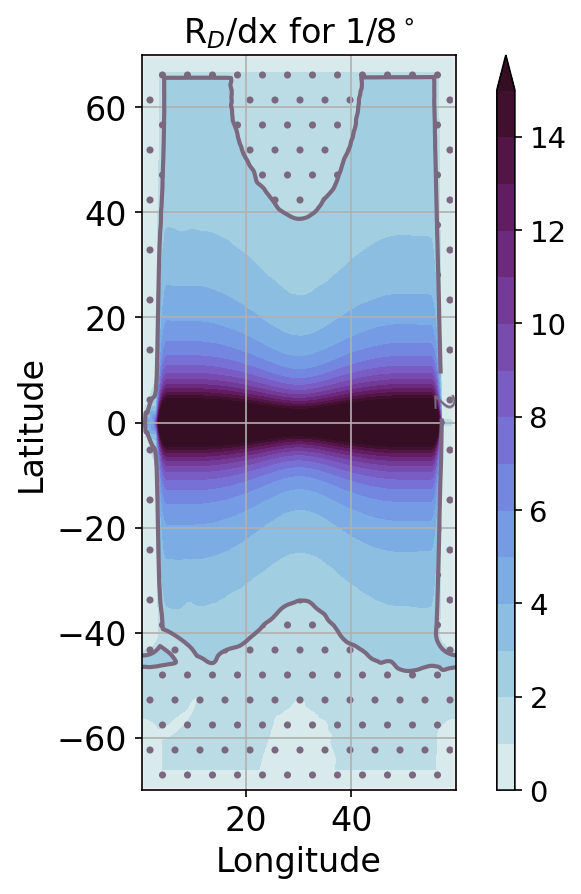

In [47]:
#Plotting Rd_dx 1/8 degree
from matplotlib.patches import Polygon, Patch

fig = plt.figure(figsize=(4, 7), dpi=150, facecolor='w', edgecolor='#7a687f')
plt.rcParams.update({'hatch.color': '#7a687f'})

ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('R$_D$/dx for 1/8$^\circ$',fontsize=16)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

levels=np.linspace(0,15,16)
plotted =ax1.contourf(xh2,yh2,EighthRd_dx,levels=levels,cmap=cmocean.cm.dense,edgecolor='red',extend='max')
CS=ax1.contour(xh2, yh2,EighthRd_dx,levels = [2],edgecolor='red',
                 colors=('#7a687f'),linestyles=('-',),linewidths=(2,))
CS1=ax1.contourf(xh2, yh2,EighthRd_dx,levels = [0,2],alpha=0,
                 linestyles=('-',),hatches='.')



ax1.clabel(CS, fmt = '%2.1d', colors = '#7a687f', fontsize=14)
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
ax1.grid(True)




plt.show()

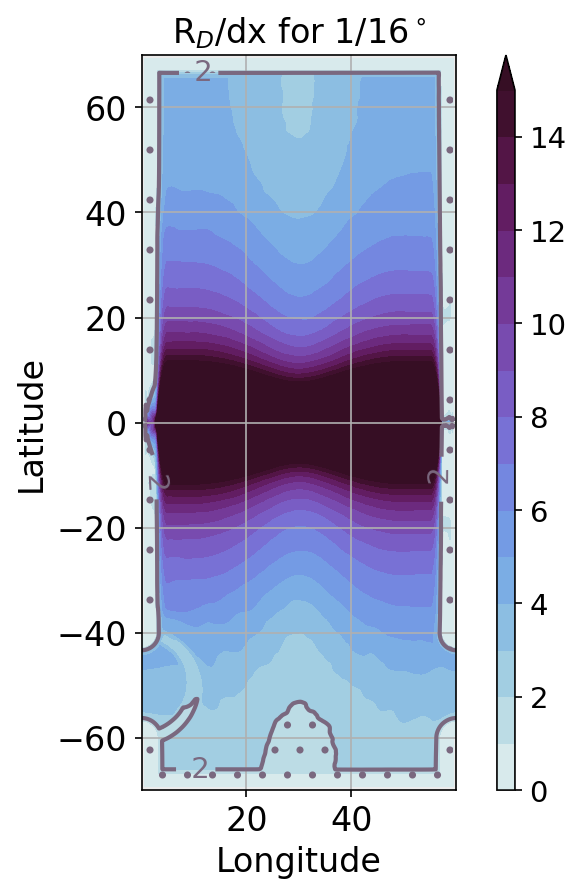

In [48]:
#Plotting Rd_dx 1/16 degree
from matplotlib.patches import Polygon, Patch

fig = plt.figure(figsize=(4, 7), dpi=150, facecolor='w', edgecolor='#7a687f')
plt.rcParams.update({'hatch.color': '#7a687f'})

ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('R$_D$/dx for 1/16$^\circ$',fontsize=16)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

levels=np.linspace(0,15,16)
plotted =ax1.contourf(xh3,yh3,SixteenthRd_dx,levels=levels,cmap=cmocean.cm.dense,edgecolor='red',extend='max')
CS=ax1.contour(xh3,yh3,SixteenthRd_dx,levels = [2],edgecolor='red',
                 colors=('#7a687f'),linestyles=('-',),linewidths=(2,))
CS1=ax1.contourf(xh3,yh3,SixteenthRd_dx,levels = [0,2],alpha=0,
                 linestyles=('-',),hatches='.')



ax1.clabel(CS, fmt = '%2.1d', colors = '#7a687f', fontsize=14)
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
ax1.grid(True)




plt.show()

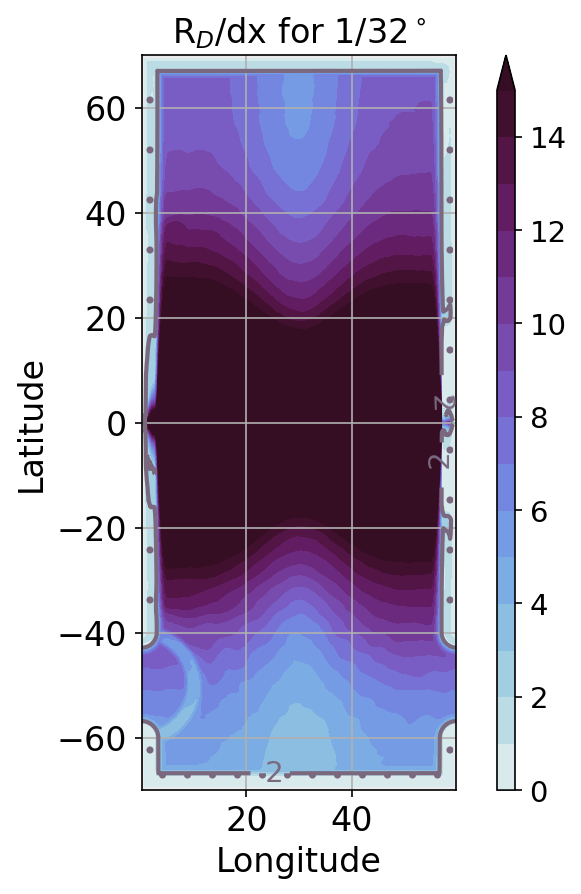

In [49]:
#Plotting Rd_dx 1/32 degree
from matplotlib.patches import Polygon, Patch

fig = plt.figure(figsize=(4, 7), dpi=150, facecolor='w', edgecolor='#7a687f')
plt.rcParams.update({'hatch.color': '#7a687f'})

ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('R$_D$/dx for 1/32$^\circ$',fontsize=16)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

levels=np.linspace(0,15,16)
plotted =ax1.contourf(xh4,yh4,ThirtysecondRd_dx,levels=levels,cmap=cmocean.cm.dense,edgecolor='red',extend='max')
CS=ax1.contour(xh4,yh4,ThirtysecondRd_dx,levels = [2],edgecolor='red',
                 colors=('#7a687f'),linestyles=('-',),linewidths=(2,))
CS1=ax1.contourf(xh4,yh4,ThirtysecondRd_dx,levels = [0,2],alpha=0,
                 linestyles=('-',),hatches='.')



ax1.clabel(CS, fmt = '%2.1d', colors = '#7a687f', fontsize=14)
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
ax1.grid(True)




plt.show()

In [35]:
levels

array([0., 1., 2., 3., 4., 5., 6.])

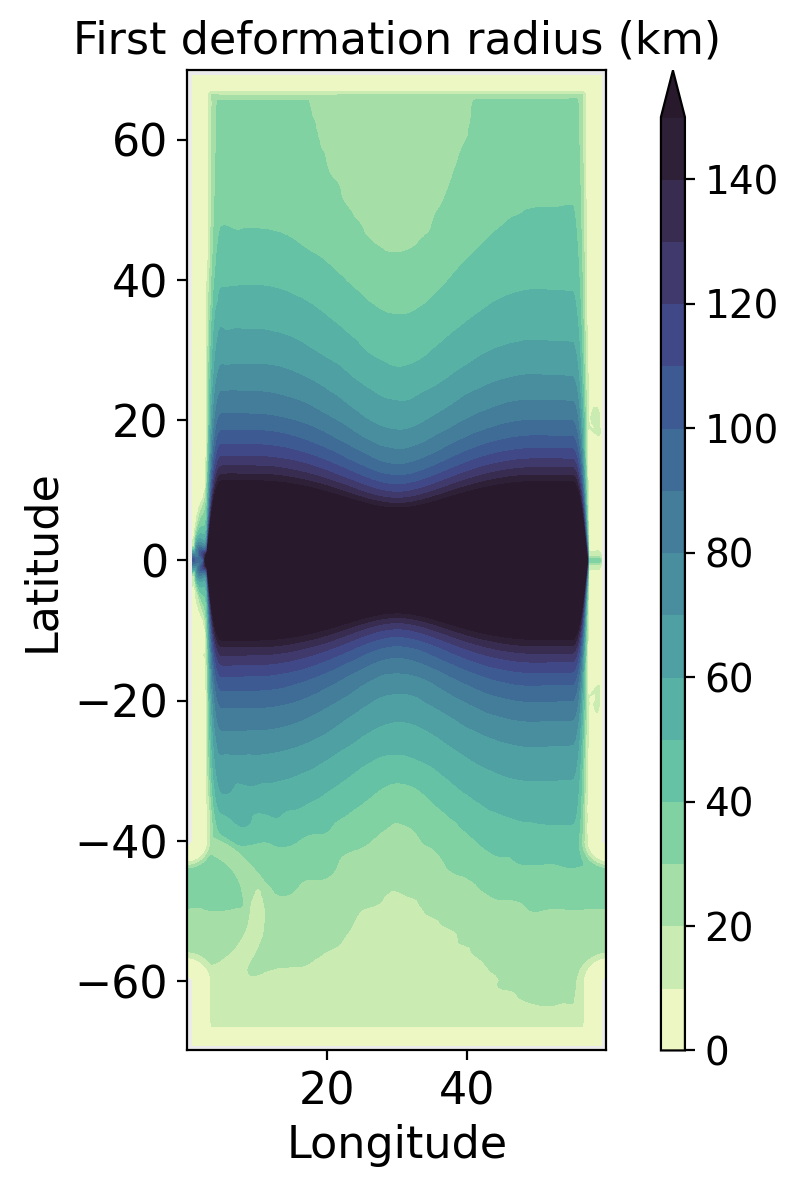

In [31]:
#Plotting first deformation radius 1/4 degree
fig = plt.figure(figsize=(4, 7), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('First deformation radius (km)',fontsize=16)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

levels=np.linspace(0,150,16)
plotted =ax1.contourf(xh1,yh1,QuarterRd1/1000,levels=levels,cmap=cmocean.cm.deep,extend='max')
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()
#fig.savefig('Rd1.png')

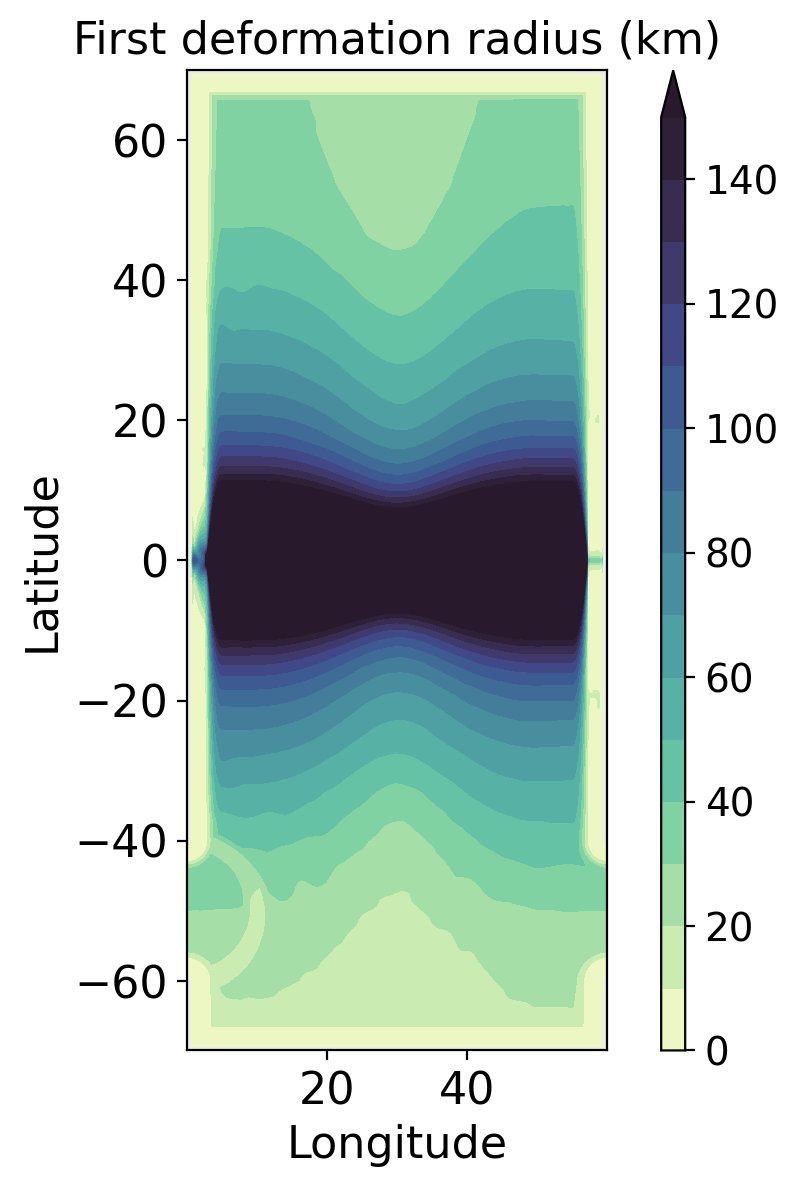

In [33]:
#Plotting first deformation radius 1/8 degree
fig = plt.figure(figsize=(4, 7), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('First deformation radius (km)',fontsize=16)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

levels=np.linspace(0,150,16)
plotted =ax1.contourf(xh2,yh2,EighthRd1/1000,levels=levels,cmap=cmocean.cm.deep,extend='max')
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()
#fig.savefig('Rd1.png')

In [34]:
#Interpolating the 1/8 degree results onto 1/4 degree grid:
from scipy.interpolate import griddata
X1, Y1 = np.meshgrid(xh1,yh1)
X2, Y2 = np.meshgrid(xh2,yh2)
Int_EighthRd1=griddata((X2.flatten(),Y2.flatten()),EighthRd1.flatten() , (X1,Y1),method='linear')
Int_EighthRd_dx=griddata((X2.flatten(),Y2.flatten()),EighthRd_dx.flatten() , (X1,Y1),method='linear')
np.nanmax(Int_EighthRd1)

445495.390625

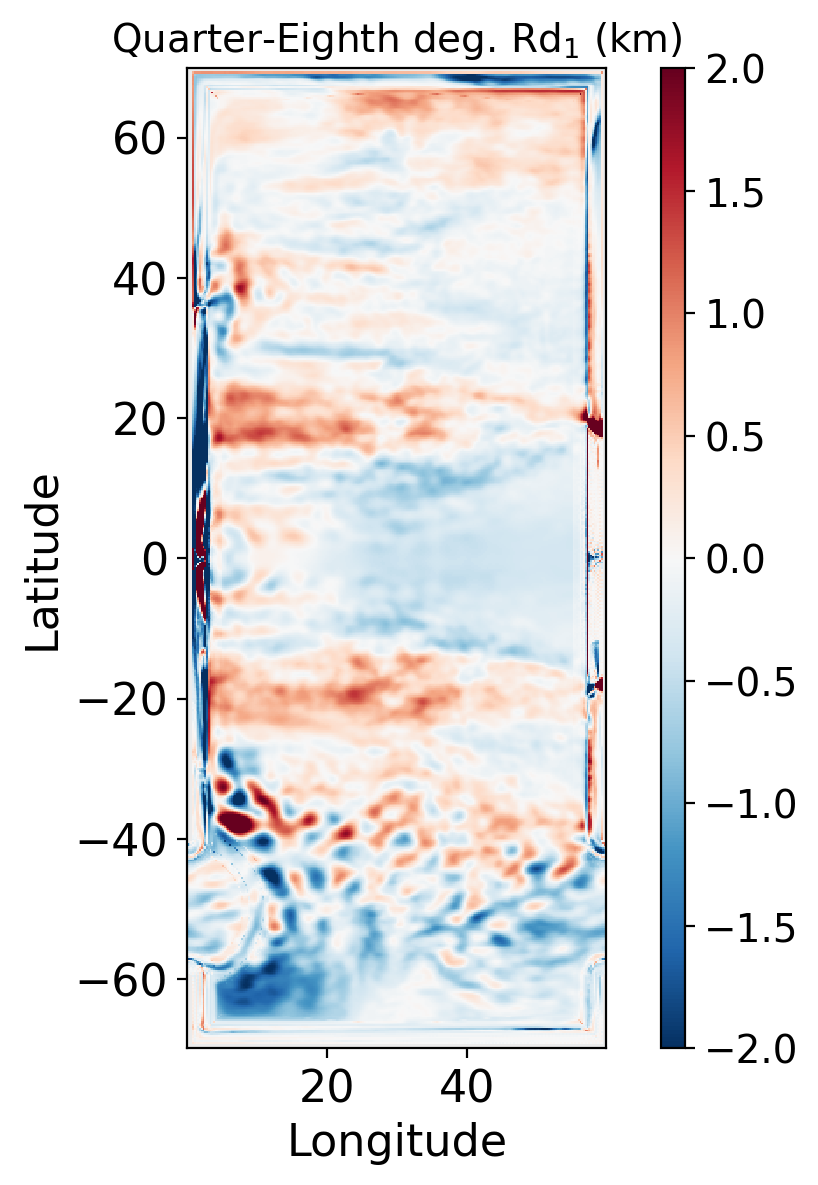

In [36]:
#Plotting Difference in deformation Radii
fig = plt.figure(figsize=(4, 7), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('Quarter-Eighth deg. Rd$_1$ (km)',fontsize=14)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

levels=np.linspace(0,150,16)
plotted =ax1.pcolor(xh1,yh1,(QuarterRd1-Int_EighthRd1)/1000,cmap='RdBu_r',vmin=-2,vmax=2)
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()
#fig.savefig('Rd1.png')

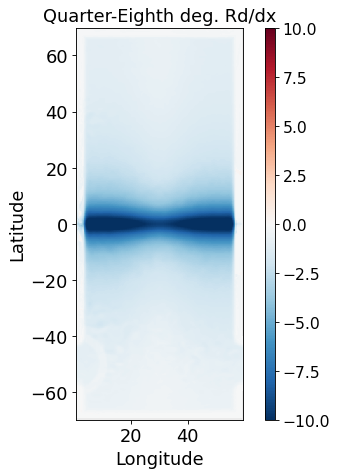

In [103]:
#Plotting Difference in Rd_dx
fig = plt.figure(figsize=(4, 7), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('Quarter-Eighth deg. Rd/dx',fontsize=16)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

levels=np.linspace(0,150,16)
plotted =ax1.pcolor(xh1,yh1,(QuarterRd_dx-Int_EighthRd_dx),cmap='RdBu_r',vmin=-10,vmax=10)
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()
#fig.savefig('Rd1.png')

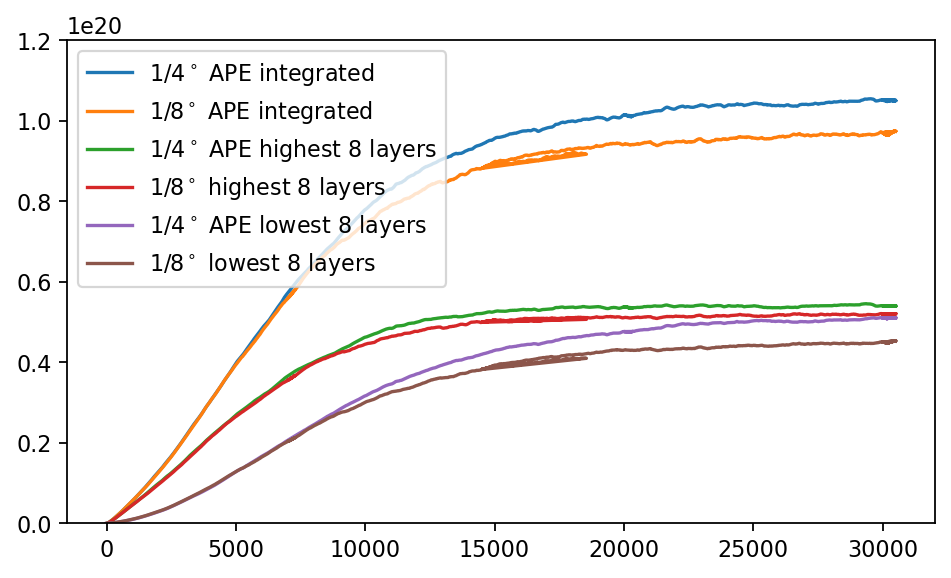

In [18]:
fig=plt.figure(figsize=(7, 4), dpi=160, facecolor='w', edgecolor='k')
plt.plot(Time1,np.nansum(APE1,axis=1))
plt.plot(Time2,np.nansum(APE2,axis=1))
plt.plot(Time1,np.nansum(APE1[:,0:8],axis=1))
plt.plot(Time2,np.nansum(APE2[:,0:8],axis=1))
plt.plot(Time1,np.nansum(APE1[:,8:16],axis=1))
plt.plot(Time2,np.nansum(APE2[:,8:16],axis=1))
plt.ylim(0,1.2e20)
plt.legend(['1/4$^\circ$ APE integrated','1/8$^\circ$ APE integrated',
           '1/4$^\circ$ APE highest 8 layers','1/8$^\circ$ highest 8 layers',
           '1/4$^\circ$ APE lowest 8 layers','1/8$^\circ$ lowest 8 layers'])

In [8]:
print(fs1)

<xarray.Dataset>
Dimensions:      (time: 1, xh: 240, xq: 241, yh: 560, yq: 561)
Coordinates:
  * xh           (xh) float64 0.125 0.375 0.625 0.875 ... 59.38 59.62 59.88
  * yh           (yh) float64 -69.88 -69.62 -69.38 -69.12 ... 69.38 69.62 69.88
  * time         (time) float64 0.0
  * xq           (xq) float64 0.0 0.25 0.5 0.75 1.0 ... 59.25 59.5 59.75 60.0
  * yq           (yq) float64 -70.0 -69.75 -69.5 -69.25 ... 69.5 69.75 70.0
Data variables:
    geolon       (yh, xh) float64 ...
    geolat       (yh, xh) float64 ...
    geolon_c     (yq, xq) float32 ...
    geolat_c     (yq, xq) float32 ...
    geolon_u     (yh, xq) float32 ...
    geolat_u     (yh, xq) float32 ...
    geolon_v     (yq, xh) float32 ...
    geolat_v     (yq, xh) float32 ...
    area_t       (yh, xh) float64 ...
    area_u       (yh, xq) float64 ...
    area_v       (yq, xh) float64 ...
    dyCu         (yh, xq) float64 ...
    dxCv         (yq, xh) float64 ...
    dxCu         (yh, xq) float64 ...
    dyCv     

In [28]:
dx025 = fs1.dxCu.values;  dx025 = (dx025[:,1:]+dx025[:,:-1])/2.  #9.58 to 27.83km
dy025 = fs1.dyCu.values;  dy025 = (dy025[:,1:]+dy025[:,:-1])/2.  #27.83km constant
print(dx025.shape, dy025.shape)
np.nanmax(dx025)

(560, 240) (560, 240)


27829.20869431084

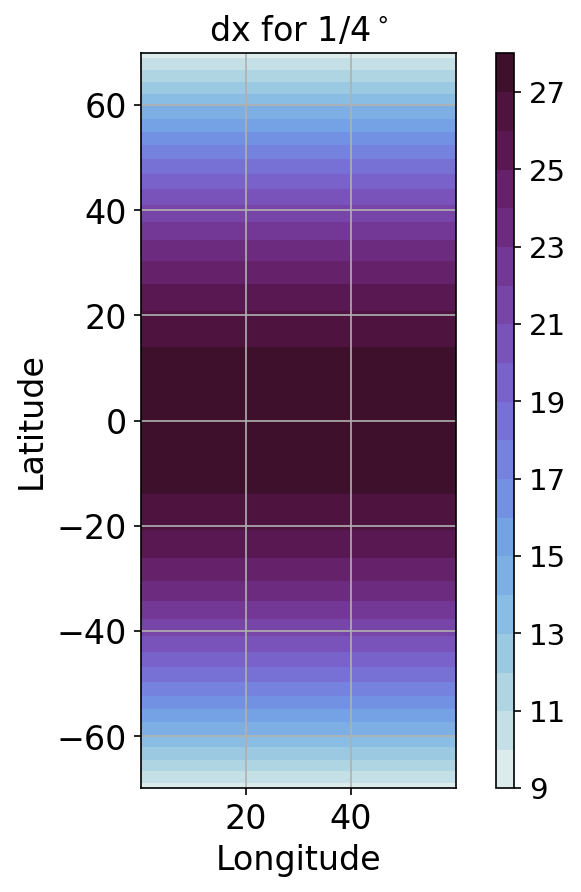

In [31]:
#Plotting Rd_dx 1/4 degree
fig = plt.figure(figsize=(4, 7), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('dx for 1/4$^\circ$',fontsize=16)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

levels=np.linspace(9,28,20)
plotted =ax1.contourf(xh1,yh1,dx025/1000,levels=levels,cmap=cmocean.cm.dense)

ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
ax1.grid(True)
plt.show()
